In [18]:
import numpy as np
import matplotlib.pyplot as plt
from your_DBSCAN import my_DBSCAN, plot_iris, visualize_dbscan

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import pandas as pd

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

colors =['k','r','b','g','c','m',]
n_colors = 6


# grid search

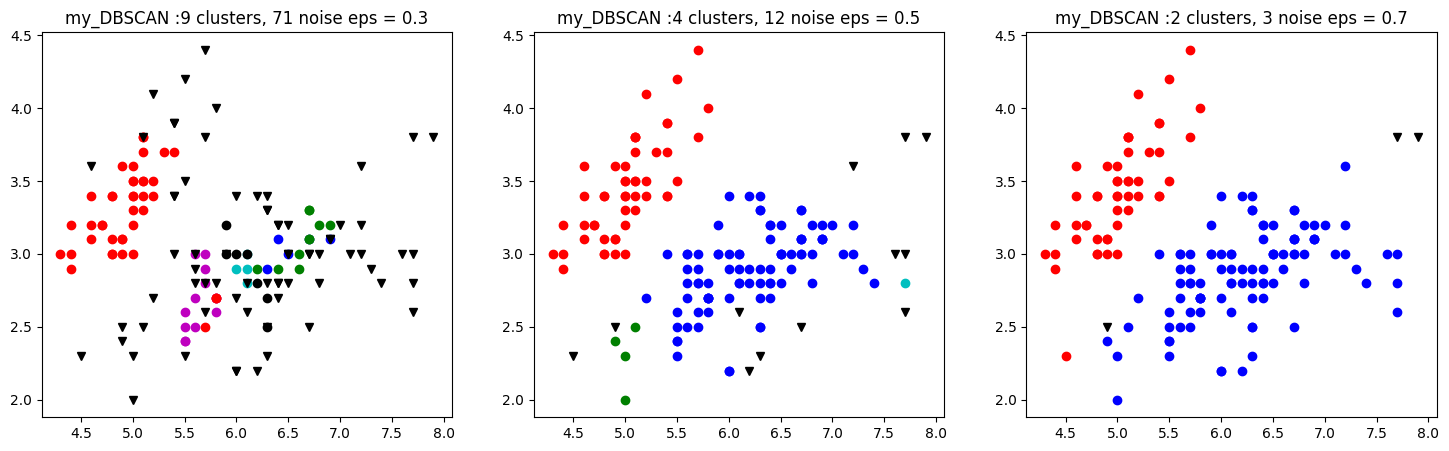

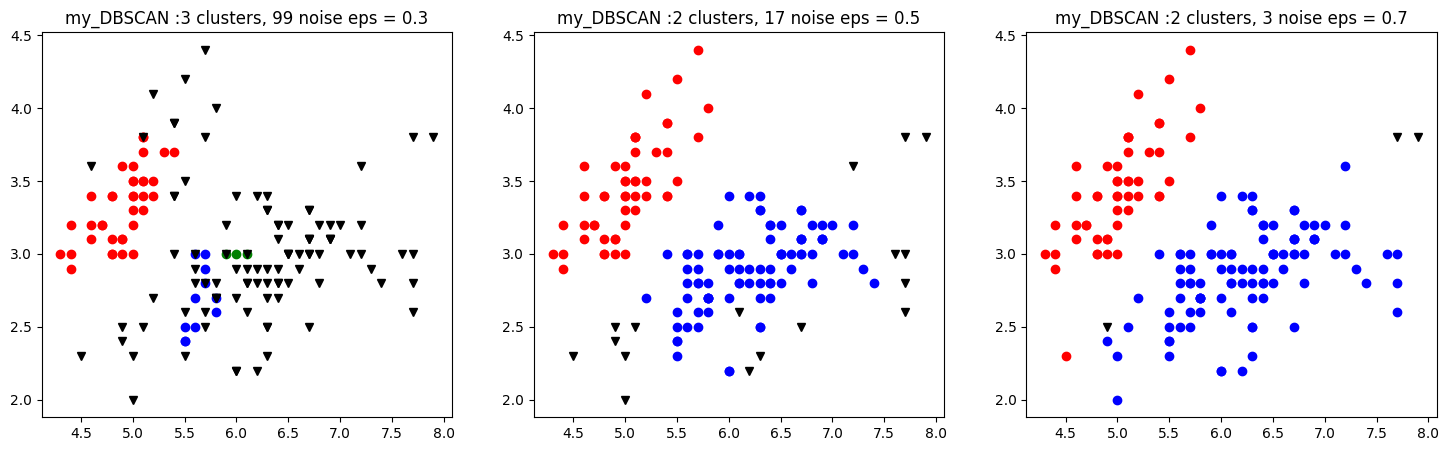

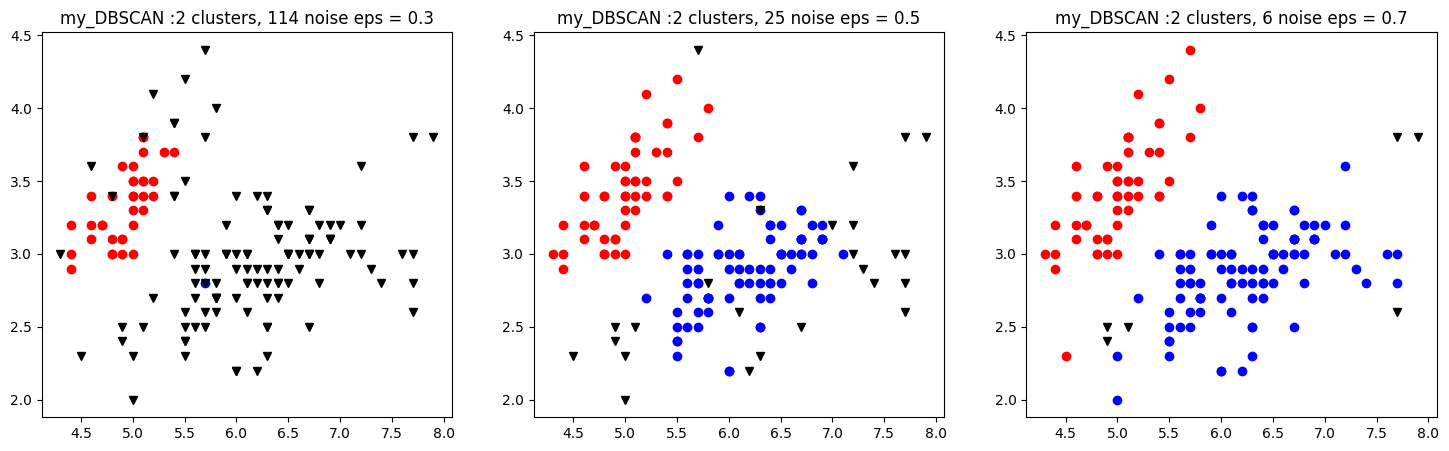

In [36]:
eps =  np.array([ 0.3, 0.5, 0.7])
minpts = np.array([ 3, 5, 7])
results = []

def visualisation_iris(X, minpts):
    i=1
    for t in [0.3,0.5,0.7]:
        
        my_y = my_DBSCAN(X,t,minpts)
        statistiques = np.unique(my_y,return_counts=True)
        K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
        Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
        results.append([K, len(Bruit)])
        fig = plt.figure(3, figsize=(18, 5))
        
        plt.subplot(1,3,i)
        for k in range(1,K+1):
            plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
        plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    
        plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise'+' eps = '+str(t))
        i+=1
    plt.show()

for minpt in minpts:
    visualisation_iris(X, minpt)


In [37]:
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=eps, columns=minpts, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[eps[i],minpts[j]] = results[i,j]

print(p)

            3        5       7
0.3   [9, 71]  [4, 12]  [2, 3]
0.5   [3, 99]  [2, 17]  [2, 3]
0.7  [2, 114]  [2, 25]  [2, 6]


# Données circulaires

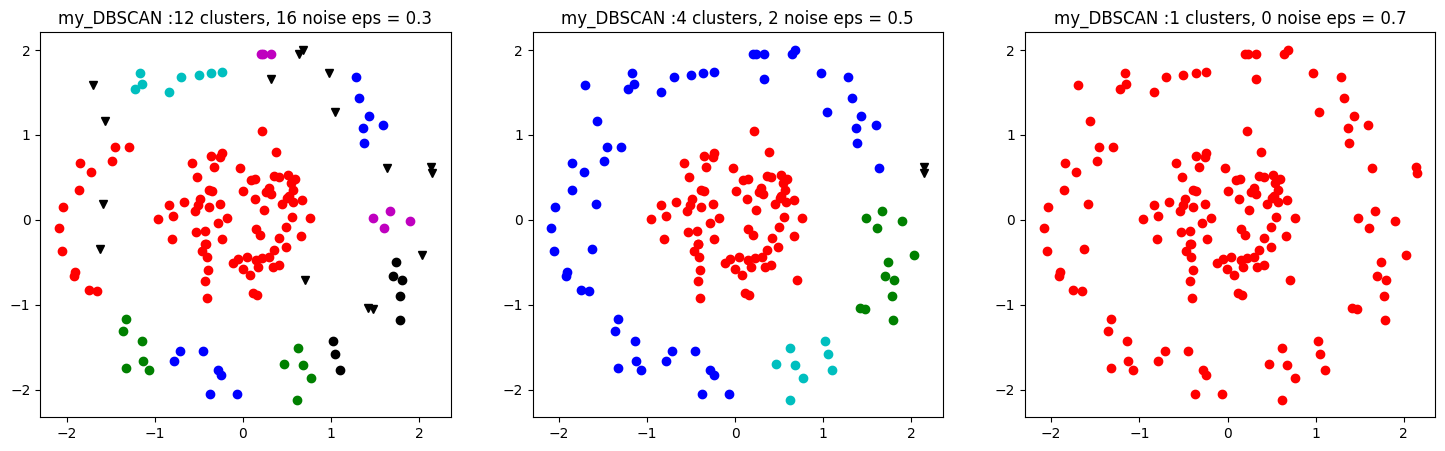

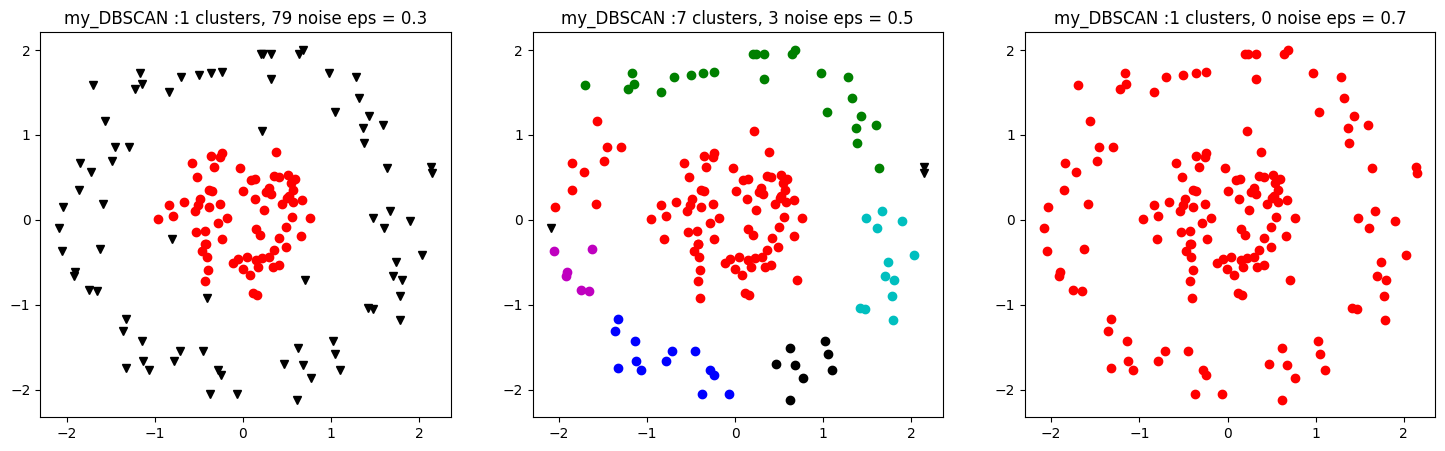

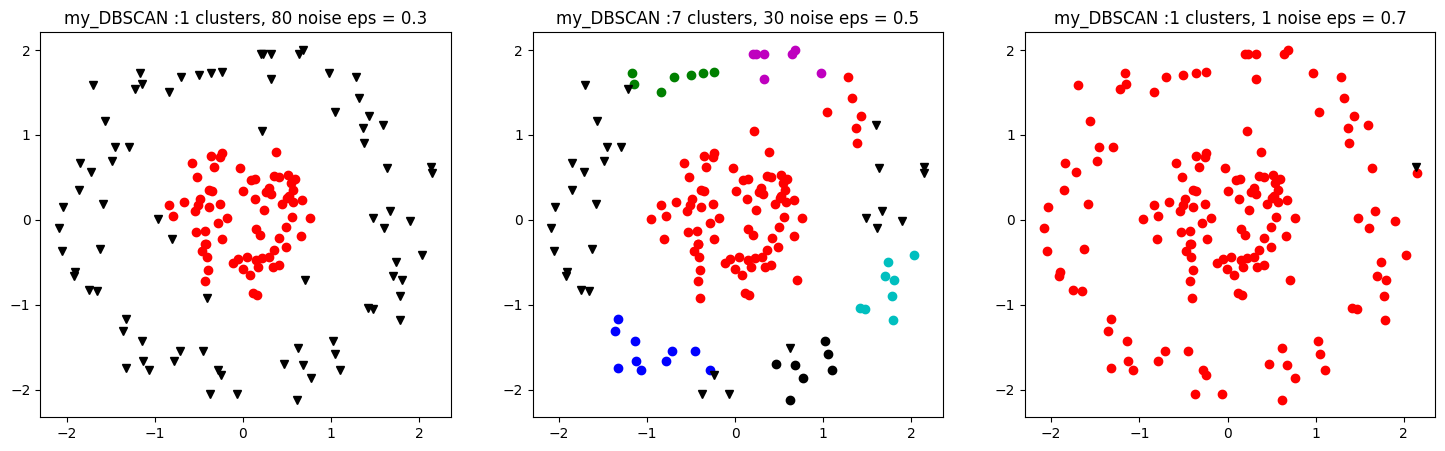

In [41]:
X_c, y = make_circles(n_samples=150, factor=0.3, noise=0.1)
X_c = StandardScaler().fit_transform(X_c)
results = []

for minpt in minpts:
    visualisation_iris(X_c, minpt)
